# Implied volatility surface

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

from typing import Callable, List
from numpy.typing import NDArray

In [106]:
yf.Ticker('TSLA').option_chain()[0]

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,TSLA230714C00020000,2023-07-10 19:38:59+00:00,20.0,248.92,247.25,247.45,0.000000,0.000000,4.0,15,0.000010,True,REGULAR,USD
1,TSLA230714C00030000,2023-07-07 18:33:43+00:00,30.0,239.20,237.40,237.40,-9.600006,-3.858523,1.0,4,0.000010,True,REGULAR,USD
2,TSLA230714C00040000,2023-07-10 17:39:11+00:00,40.0,228.36,227.30,227.45,0.000000,0.000000,1.0,2,0.000010,True,REGULAR,USD
3,TSLA230714C00050000,2023-07-10 14:55:28+00:00,50.0,221.05,217.40,217.55,0.000000,0.000000,51.0,4,0.000010,True,REGULAR,USD
4,TSLA230714C00060000,2023-07-10 19:38:59+00:00,60.0,208.93,207.85,208.00,0.000000,0.000000,3.0,4,6.226565,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,TSLA230714C00480000,2023-07-11 13:52:51+00:00,480.0,0.01,0.00,0.01,0.000000,0.000000,3.0,18,1.625002,False,REGULAR,USD
119,TSLA230714C00485000,2023-07-06 13:30:04+00:00,485.0,0.01,0.00,0.01,0.000000,0.000000,1.0,20,1.656252,False,REGULAR,USD
120,TSLA230714C00490000,2023-07-07 13:50:00+00:00,490.0,0.01,0.00,0.00,0.000000,0.000000,2.0,89,0.500005,False,REGULAR,USD
121,TSLA230714C00495000,2023-07-07 13:48:50+00:00,495.0,0.01,0.00,0.01,0.000000,0.000000,2.0,147,1.687502,False,REGULAR,USD


### Implied volatiltiy smile

Text(0, 0.5, 'Implied volatility')

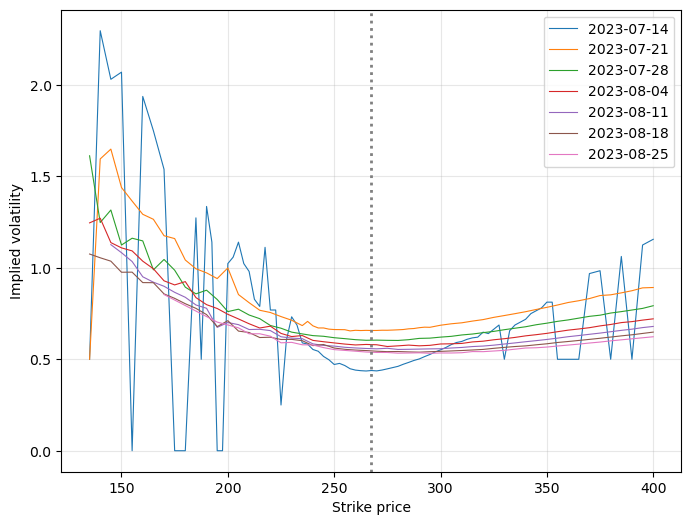

In [107]:
tk = yf.Ticker('TSLA')
exps = tk.options

spot = tk.history(period='1d')['Close'].values[0]

fig, ax = plt.subplots(figsize=(8, 6))

for i, e in enumerate(exps[:7]):
    opt =tk.option_chain(e).calls
    opt = opt.loc[opt['strike'].between(spot - spot/2, spot + spot/2)]

    vol_smile = pd.DataFrame(
        {
            'strike_price': opt['strike'],
            'implied_volatility': opt['impliedVolatility'],
            'volume': opt['volume']
        }
    )

    vol_smile.plot(x='strike_price', 
                   y='implied_volatility', 
                   ax=ax, label=e, linewidth=0.8)

ax.axvline(x=spot, linestyle=':', color='gray', linewidth=2)
ax.grid(alpha=0.3)
ax.set_xlabel('Strike price')
ax.set_ylabel('Implied volatility')